In [1]:
import quandl
import datetime
import pandas as pd

In [2]:
from tqdm import tqdm_notebook
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [96]:
from datetime import timedelta

In [55]:
import itertools

In [55]:
import itertools

In [4]:
with open("../../keys.txt", "r") as f:
    key = f.readline().replace("\n", "")

In [5]:
today = str(datetime.datetime.today())[:10]

In [6]:
down = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'close'] }, 
                        ticker = ['ASTE', 'WWR'], 
                        date = { 'gte': '2019-01-01', 'lte': today }, 
                        api_key=key)

In [7]:
down.shape

(0, 3)

In [2]:
tickers = ['AAPL', 'AMZN']

In [13]:
data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'close'] }, 
                               ticker = tickers, 
                               date = { 'gte': '2016-01-01', 'lte': today }, 
                               api_key=key)

In [233]:
# write raw data
data.to_csv("../data/190423data.csv")

In [14]:
pivoted = data.pivot(index = "date", columns = "ticker", values = "close").reset_index()

In [15]:
pivoted.head(5)

ticker,date,AAPL,AMZN
0,2016-01-04,105.35,636.99
1,2016-01-05,102.71,633.79
2,2016-01-06,100.70,632.65
3,2016-01-07,96.45,607.94
4,2016-01-08,96.96,607.05


In [18]:
pivoted.groupby("date").nunique()

,date,AAPL,AMZN
date,,,
2016-01-04,1,1,1
2016-01-05,1,1,1
2016-01-06,1,1,1
2016-01-07,1,1,1
2016-01-08,1,1,1
2016-01-11,1,1,1
2016-01-12,1,1,1
2016-01-13,1,1,1
2016-01-14,1,1,1


In [16]:
pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 3 columns):
date    560 non-null datetime64[ns]
AAPL    560 non-null float64
AMZN    560 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 13.2 KB


In [19]:
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

/anaconda3/envs/money/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


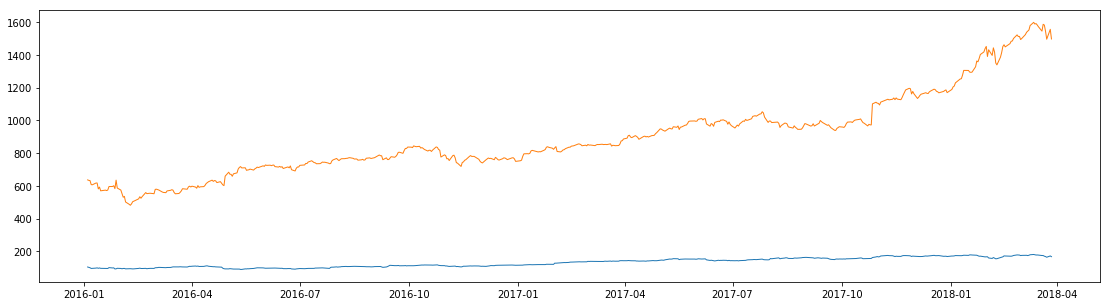

In [21]:
plt.figure(figsize=(19,5))
for ticker in tickers:
    plt.plot("date", ticker, data=pivoted, marker='', linewidth=1)

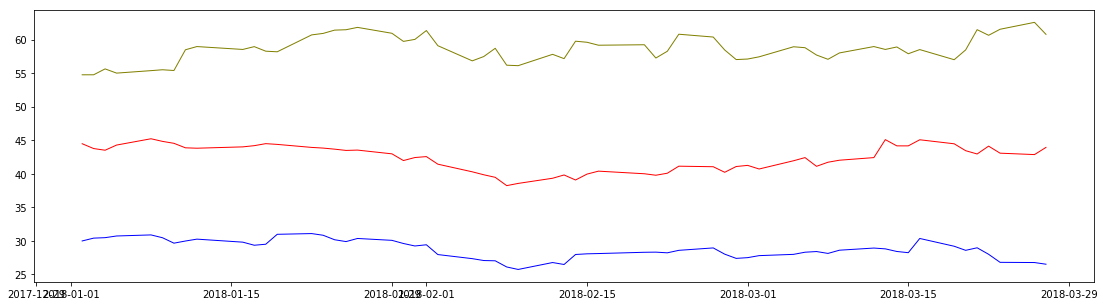

In [48]:
plt.figure(figsize=(19,5))
plt.plot('date', 'APC', data=pivoted, marker='', color='olive', linewidth=1)
plt.plot('date', 'EFII', data=pivoted, marker='', color='blue', linewidth=1)
plt.plot('date', 'PCG', data=pivoted, marker='', color='red', linewidth=1)

In [23]:
pivoted.diff().iloc[1:,1:].cumsum()

ticker,AAPL,AMZN
1,-2.640,-3.20
2,-4.650,-4.34
3,-8.900,-29.05
4,-8.390,-29.94
5,-6.820,-19.25
6,-5.390,-19.10
7,-7.960,-55.18
8,-5.830,-43.99
9,-8.220,-66.81
10,-8.690,-62.51


all_funds = ["Index", "P/E", "EPS (ttm)", "Insider Own", "Shs Outstand", "Perf Week", "Market Cap", "Forward P/E", 
             "EPS next Y", "Insider Trans", "Shs Float", "Perf Month", "Income", "PEG", "EPS next Q", "Inst Own", 
             "Short Float", "Perf Quarter", "Sales", "P/S", "EPS this Y", "Inst Trans", "Short Ratio", "Perf Half Y", 
             "Book/sh", "P/B", "EPS next Y", "ROA", "Target Price", "Perf Year", "Cash/sh", "P/C", "EPS next 5Y", 
             "ROE", "52W Range", "Perf YTD", "Dividend", "P/FCF", "EPS past 5Y", "ROI", "52W High", "Beta", 
             "Dividend %", "Quick Ratio", "Sales past 5Y", "Gross Margin", "52W Low", "ATR", "Employees", 
             "Current Ratio", "Sales Q/Q", "Oper. Margin", "RSI (14)", "Volatility", "Optionable", "Debt/Eq", 
             "EPS Q/Q", "Profit Margin", "Rel Volume", "Prev Close", "Shortable", "LT Debt/Eq", "Earnings", "Payout", 
             "Avg Volume", "Price", "Recom", "SMA20", "SMA50", "SMA200", "Volume", "Change"]

In [25]:
data.head(5)

,ticker,date,close
None,,,
0,AMZN,2018-03-27,1497.05
1,AMZN,2018-03-26,1555.86
2,AMZN,2018-03-23,1495.56
3,AMZN,2018-03-22,1544.10
4,AMZN,2018-03-21,1581.86


# Data Prep

In [104]:
d1 = datetime.datetime(2016,1,4)

In [96]:
from datetime import timedelta

In [169]:
df_aapl = pivoted[['date', tickers[0]]]

In [178]:
d2 = df_aapl.date.max()

In [179]:
dates = [d1+timedelta(i) for i in range((d2 - d1).days)]

In [180]:
dailys = pd.DataFrame(dates).rename(columns = {0:'date'})

In [181]:
df_aapl = dailys.merge(df_aapl, how="left").set_index('date')

In [182]:
df_aapl.ffill(inplace=True)

In [194]:
# create freq indicator for index
df_aapl.index = pd.DatetimeIndex(df_aapl.index.values,
                               freq=df_aapl.index.inferred_freq)

In [218]:
def dataPrep( d1 = datetime.datetime(2016,1,4), ticker = tickers[0] ):
    df_aapl = pivoted[['date', ticker]]
    d2 = df_aapl.date.max()
    dates = [d1+timedelta(i) for i in range((d2 - d1).days)]
    dailys = pd.DataFrame(dates).rename(columns = {0:'date'})
    df_aapl = dailys.merge(df_aapl, how="left").set_index('date')
    df_aapl.ffill(inplace=True)
    # create freq indicator for index
    df_aapl.index = pd.DatetimeIndex(df_aapl.index.values,
                                   freq=df_aapl.index.inferred_freq)
    print("Finished prepping data.\nThere are {} rows of data.".format(df_aapl.shape[0]))
    return df_aapl

In [183]:
df_aapl.shape

(813, 1)

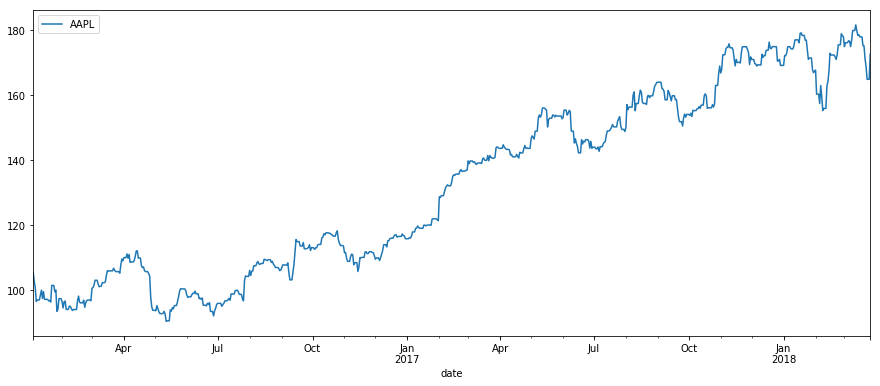

In [184]:
df_aapl.plot(figsize=(15, 6))

# Modeling

### - Decomposition

In [53]:
freq_step = 24*7

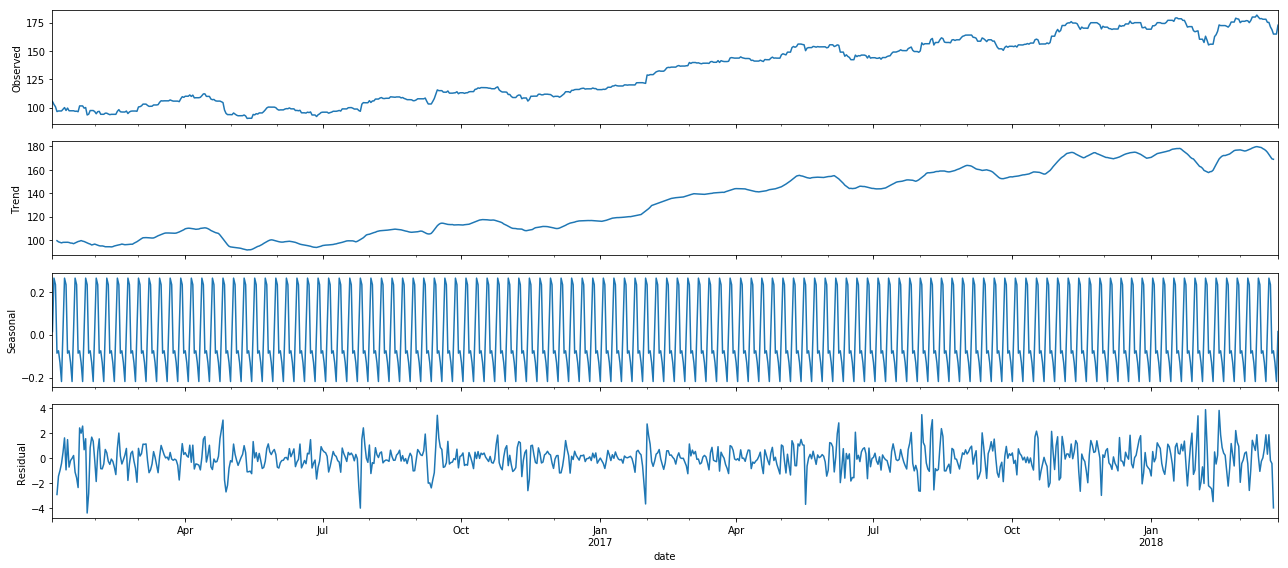

In [185]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_aapl, model='additive') # freq=freq_step
fig = decomposition.plot()
plt.show()

### - SARIMA

1. Get best params

In [55]:
import itertools

In [56]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [196]:
grid_result = dict()

In [197]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_aapl,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            grid_result[param, param_seasonal] = results.aic
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10274.66988559837
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9094.469573082968
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4985.538288604724
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4921.16402552294
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4967.505674296481
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4959.862731869494
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4926.71754079693
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4921.981262262814
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9157.787845839117
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8013.405416669417
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4224.42279075413
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4155.2267141156635
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4220.530273322747


/anaconda3/envs/money/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4221.690570595293
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4168.866437761546
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4156.702728519978
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2917.667847569761
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2864.7421111675
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:3441.15954633152
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2863.062133700235
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2868.838981550847
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2859.8220510193096
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:3151.026422134886
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2866.2364612720958
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2914.13689994391
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2862.6026992926554
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:3438.8022313213137
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2862.8485013162126
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2869.4091997042838
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2855.3478280900763
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:3151.0053252100297
ARIMA(

/anaconda3/envs/money/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2872.567509320798
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:3417.755202478318
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2874.531791106505
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2867.646567243076
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2860.6705456130994
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:3136.0057699889085
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2873.8594100708115
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2918.3501905958624


/anaconda3/envs/money/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2871.6999121568906
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:3413.275143094063
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2867.8100598287356
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2868.457531221341
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2856.4827498395503
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:3133.8222850326715
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2868.3442213162616
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2918.4446031404577
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2865.2111974319128
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:3443.0141192458254
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2866.0043603740914
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2866.823956760948
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2858.3991883472995
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:3141.28384068624
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2865.8858134424663
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2912.5961723768623
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2863.7142566414113
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:3401.99649280448

/anaconda3/envs/money/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [201]:
for k, v in grid_result.items():
    if v == min(grid_result.values()):
        best = k

In [202]:
best

((1, 1, 1), (0, 1, 1, 12))

In [219]:
def pickBestParams(df_aapl):
    
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    grid_result = dict()

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(df_aapl,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                grid_result[param, param_seasonal] = results.aic
            except:
                continue

    for k, v in grid_result.items():
        if v == min(grid_result.values()):
            best = k

    return best

2. Build model

In [203]:
mod = sm.tsa.statespace.SARIMAX(df_aapl,
                                order=best[0],
                                seasonal_order=best[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9024      0.034    -26.893      0.000      -0.968      -0.837
ma.L1          1.0701      0.037     28.540      0.000       0.997       1.144
ma.S.L12      -1.0268      0.023    -43.776      0.000      -1.073      -0.981
sigma2         1.7492      0.129     13.573      0.000       1.497       2.002


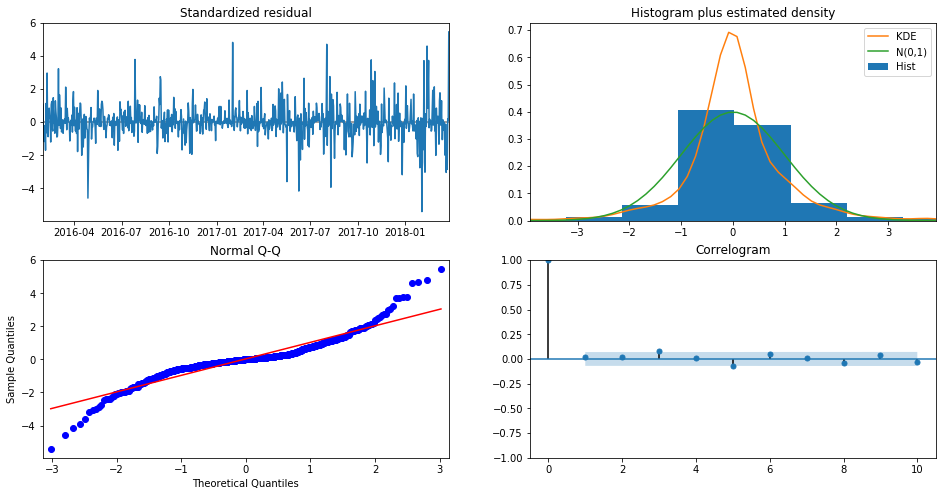

In [204]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

> **Need to log transform?**

3. Validate model

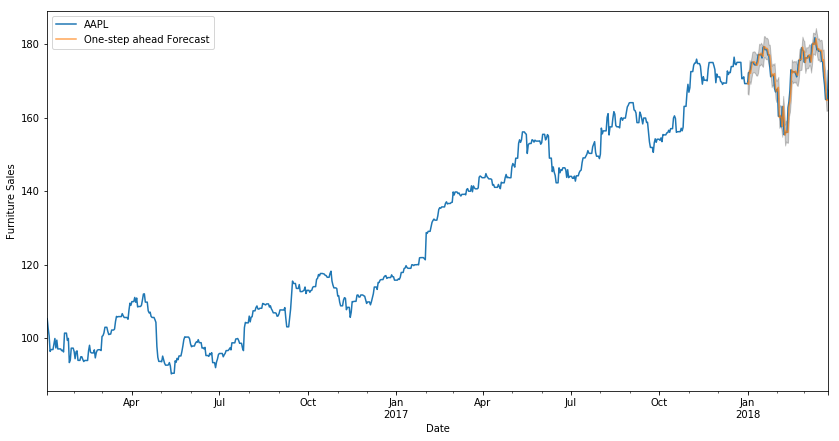

In [206]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_aapl['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [211]:
y_forecasted = pred.predicted_mean
y_truth = df_aapl['2018-01-01':][tickers[0]]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5.26


4. Forecasting

/anaconda3/envs/money/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


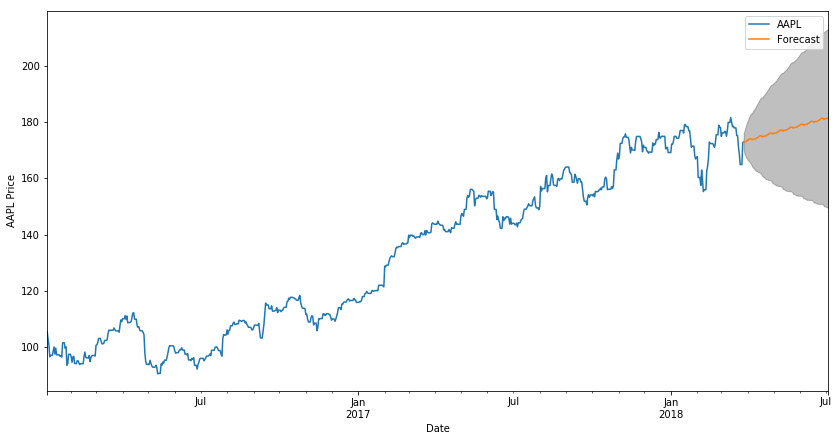

In [213]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = df_aapl.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('{} Price'.format(tickers[0]))
plt.legend()
plt.show()

5. Test model on another ticker

In [216]:
df_amzn = dataPrep(ticker=tickers[1])

finished prepping data.
There are 813 rows of data.


In [220]:
best = pickBestParams(df_amzn)

/anaconda3/envs/money/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/envs/money/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/money/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/money/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to conv

In [222]:
best

((1, 1, 1), (0, 1, 1, 12))

In [223]:
mod = sm.tsa.statespace.SARIMAX(df_amzn,
                                order=best[0],
                                seasonal_order=best[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8954      0.093      9.634      0.000       0.713       1.078
ma.L1         -0.9097      0.088    -10.341      0.000      -1.082      -0.737
ma.S.L12      -1.0345      0.019    -54.257      0.000      -1.072      -0.997
sigma2       132.2487      4.741     27.896      0.000     122.957     141.540


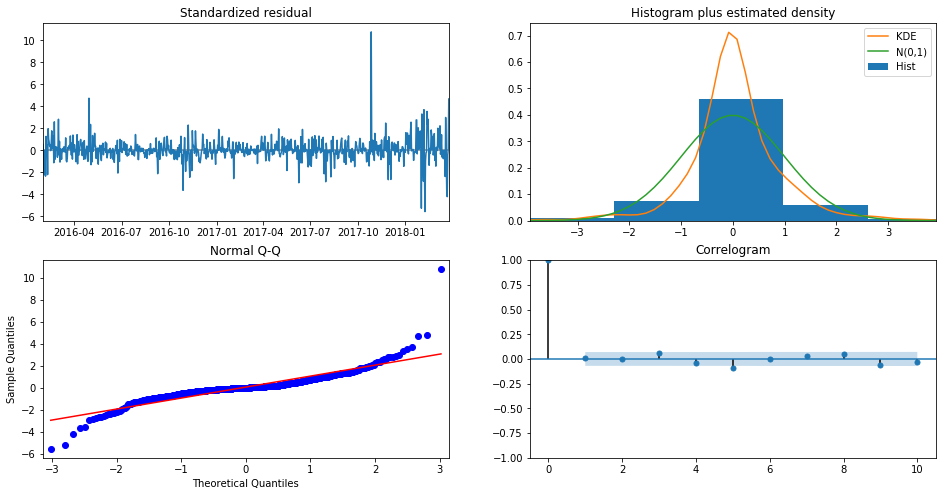

In [224]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

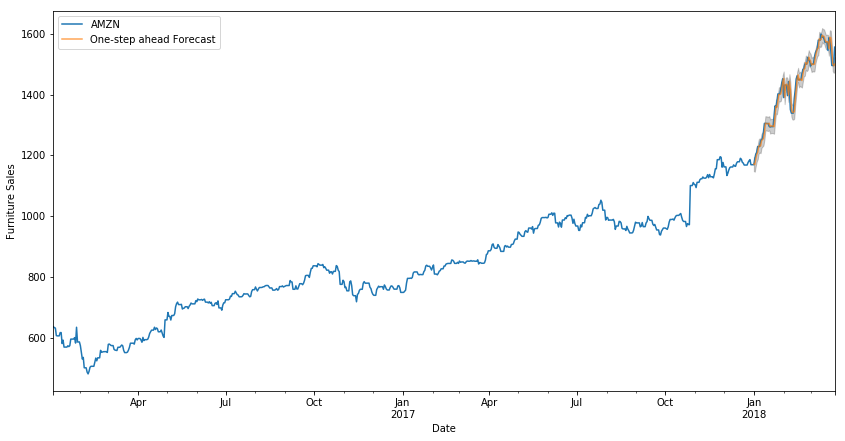

In [230]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_amzn['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

/anaconda3/envs/money/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


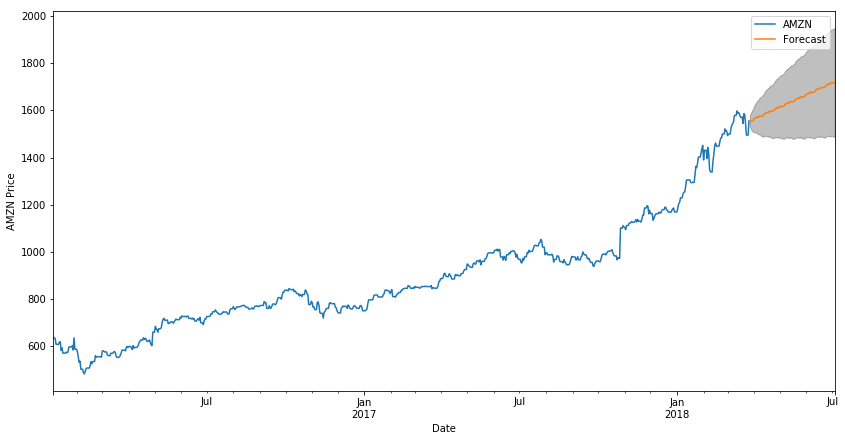

In [228]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = df_amzn.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('{} Price'.format(tickers[1]))
plt.legend()
plt.show()

# Get fundamentals

quandl.get_table('SHARADAR/SF1', ticker = tickers, calendardate={'gte':'2017-09-01','lte':'2018-01-10'}, 
                 paginate=True, api_key = key)

In [15]:
daily = quandl.get_table('SHARADAR/DAILY', 
                 ticker= tickers, 
                 date = { 'gte': '2016-01-01', 'lte': '2016-12-31' },
                 paginate=True, api_key=key)

In [34]:
daily

,ticker,date,lastupdated,ev,evebit,evebitda,marketcap,pb,pe,ps
None,,,,,,,,,,
0,MSFT,2016-12-30,2018-10-21,420918.3,21.5,15.9,483160.3,6.9,29.2,5.7
1,MSFT,2016-12-29,2018-10-21,426827.5,21.8,16.1,489069.5,6.9,29.5,5.7
2,MSFT,2016-12-28,2018-10-21,427527.3,21.9,16.1,489769.3,7.0,29.6,5.7
3,MSFT,2016-12-27,2018-10-21,429782.2,22.0,16.2,492024.2,7.0,29.7,5.8
4,MSFT,2016-12-23,2018-10-21,429471.2,22.0,16.2,491713.2,7.0,29.7,5.8
5,MSFT,2016-12-22,2018-10-21,431881.5,22.1,16.3,494123.5,7.0,29.8,5.8
6,MSFT,2016-12-21,2018-10-21,431803.8,22.1,16.3,494045.8,7.0,29.8,5.8
7,MSFT,2016-12-20,2018-10-21,431803.8,22.1,16.3,494045.8,7.0,29.8,5.8
8,MSFT,2016-12-19,2018-10-21,432425.8,22.1,16.3,494667.8,7.0,29.9,5.8


## analysis

In [35]:
pivoted.head()

ticker,date,AAPL,MSFT
0,2016-01-04,105.35,54.80
1,2016-01-05,102.71,55.05
2,2016-01-06,100.70,54.05
3,2016-01-07,96.45,52.17
4,2016-01-08,96.96,52.33


In [16]:
com = daily.merge(data, on=["ticker", "date"])

In [17]:
com.columns

Index(['ticker', 'date', 'lastupdated', 'ev', 'evebit', 'evebitda',
       'marketcap', 'pb', 'pe', 'ps', 'close'],
      dtype='object')

## Train test split

In [18]:
train_cols = ['ev', 'evebit', 'evebitda',
       'marketcap', 'pb', 'pe', 'ps', 'close']

In [19]:
train = com[com.ticker == tickers[0]]

In [20]:
test = com[com.ticker == tickers[1]]

## Normalizing the data

df_train, df_test = train_test_split(df_ge, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))

In [22]:
# scale the feature MinMax, build array
x = train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(test.loc[:,train_cols])

## Time series prepping

In [24]:
def build_timeseries(mat, y_col_index, TIME_STEPS):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [25]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

## Running Model

### - LSTM

In [64]:
BATCH_SIZE = 5
TIME_STEPS = 60

In [65]:
x_t, y_t = build_timeseries(x_train, len(train_cols)-1, TIME_STEPS)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_test, len(train_cols)-1, TIME_STEPS)
x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)


length of time-series i/o (192, 60, 8) (192,)



length of time-series i/o (192, 60, 8) (192,)


In [66]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
#optimizer = optimizers.RMSprop(lr=lr)
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
#csv_logger = CSVLogger(os.path.join("../output/", 'test' + '.log'), append=True)
history = lstm_model.fit(x_t, y_t, epochs=10, verbose=2, batch_size=BATCH_SIZE,
                    shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
                    trim_dataset(y_val, BATCH_SIZE)))#, callbacks=[csv_logger])

Train on 190 samples, validate on 95 samples
Epoch 1/10
 - 2s - loss: 0.0644 - val_loss: 2.9884
Epoch 2/10
 - 1s - loss: 0.0591 - val_loss: 3.3617
Epoch 3/10
 - 1s - loss: 0.0486 - val_loss: 3.7194
Epoch 4/10
 - 1s - loss: 0.0329 - val_loss: 4.1316
Epoch 5/10
 - 1s - loss: 0.0298 - val_loss: 4.4041
Epoch 6/10
 - 1s - loss: 0.0230 - val_loss: 3.9818
Epoch 7/10
 - 1s - loss: 0.0166 - val_loss: 4.4588
Epoch 8/10
 - 1s - loss: 0.0109 - val_loss: 4.4265
Epoch 9/10
 - 1s - loss: 0.0109 - val_loss: 4.3850
Epoch 10/10
 - 1s - loss: 0.0089 - val_loss: 4.4826


In [69]:
test_pred = lstm_model.predict(x_test_t, verbose=2, batch_size=BATCH_SIZE)

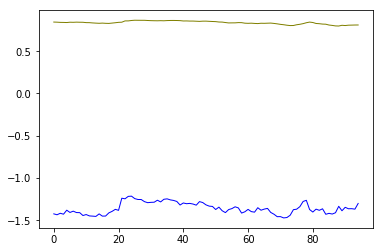

In [76]:
plt.plot(test_pred, color='olive', linewidth=1)
plt.plot(y_test_t, color='blue', linewidth=1)

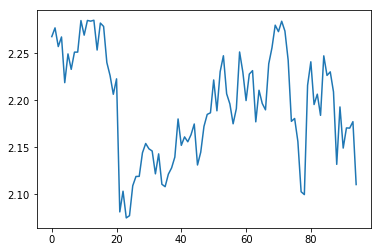

In [80]:
plt.plot(test_pred - y_test_t.reshape([95, 1]))

## not used

In [73]:
"""
First visit www.Finviz.com and get the base url for the quote page.
example: http://finviz.com/quote.ashx?t=aapl

Then write a simple function to retrieve the desired ratio. 
In this example I'm grabbing Price-to-Book (mrq) ratio

source: http://www.blackarbs.com/blog/8/7/2015/get-free-financial-data-w-python-fundamental-ratios-from-finvizcom
"""

def get_fundamental( symbol, fund ):
    try:
        url = r'http://finviz.com/quote.ashx?t={}'.format(symbol.lower())
        html = u.request.urlopen(url).read()
        soup = bs(html) # lxml but not neccessary
        # Change the text below to get a diff metric
        pb =  soup.find(text = fund)
        pb_ = pb.find_next(class_='snapshot-td2').text
        #print( '{} {} = {}'.format(symbol, fund, pb_) )
        return pb_
    except Exception as e:
        print(e)

In [75]:
get_fundamental("AAPL", "P/B")

'8.01'

In [ ]:
data.write_csv("../../data"+outputfile)